# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1) Trees are built by splitting the data into groups. The splits are chosen to best separate the target using rules based on the features.

2) Trees don’t need a straight-line pattern. They can handle curves or sudden changes by making lots of splits. Linear models can’t do that unless you change the variables first.

3) Gini tells us how mixed the classes are in a group. A low Gini means the group is mostly one class, which is good. It helps the tree find splits.

4) Trees can get too detailed and fit the training data too perfectly, even the noise. We can stop this by limiting how deep the tree goes or setting rules for when it can split.

5) False since trees work well with both categorical and numeric features. They know how to split numbers and categories without extra work.

6) Two branch splits are easier to work with and understand. They also let the tree build complex rules step by step.

7) If the tree is very deep and has lots of tiny branches, it might be overfitting. If it’s too shallow, it might be underfitting. You can also compare accuracy on training and test data.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [62]:
! git clone https://github.com/conorgibbons147/trees.git

fatal: destination path 'trees' already exists and is not an empty directory.


In [63]:
! git clone https://github.com/conorgibbons147/linearModels.git

fatal: destination path 'linearModels' already exists and is not an empty directory.


In [64]:
! cd trees/data && ls

airbnb_hw.csv  divorce	heart_failure  land_mines.csv  zoo.csv


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# 1.
data = pd.read_csv('trees/assignment/data/cars_hw.csv')
df = pd.DataFrame(data)
print(data.shape)
data.head()

(976, 12)


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [67]:
# 2.
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
# 3.
r2_scores = []

for leaf_size in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

best_leaf = r2_scores[0][0]
best_r2 = r2_scores[0][1]

# Step 3: Compare the rest
for leaf, score in r2_scores:
    if score > best_r2:
        best_leaf = leaf
        best_r2 = score

print('Best min_samples_leaf:', best_leaf)
print('Best R2:', best_r2)

Best min_samples_leaf: 1
Best R2: 0.870907378009237


Test R2: 0.8509235343255162
Test RMSE: 142884.04823535323


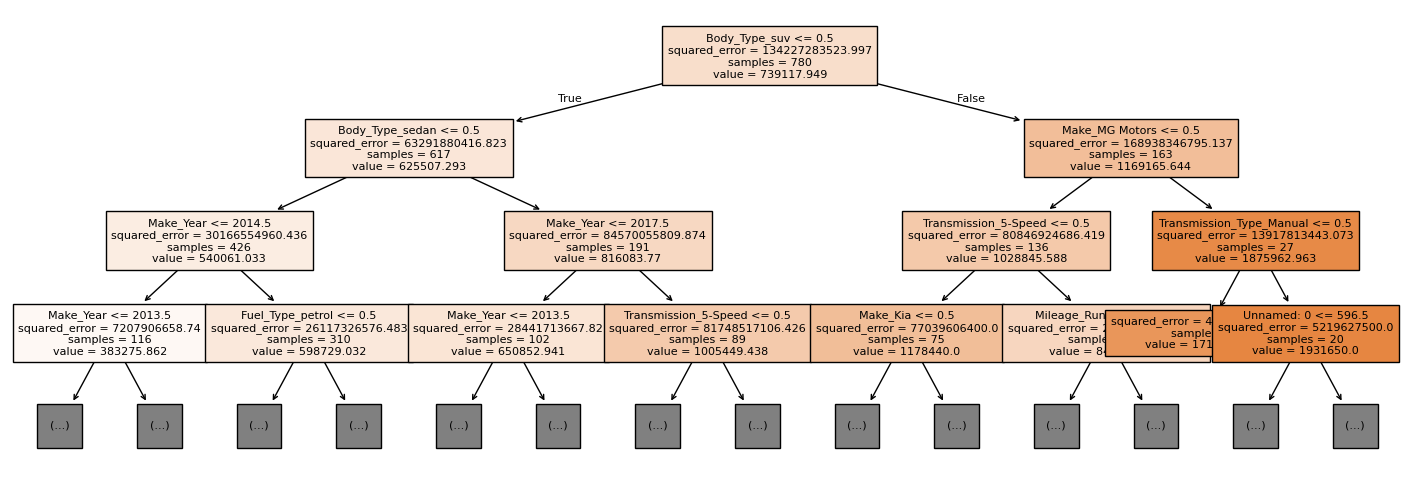

<Axes: xlabel='Price', ylabel='Density'>

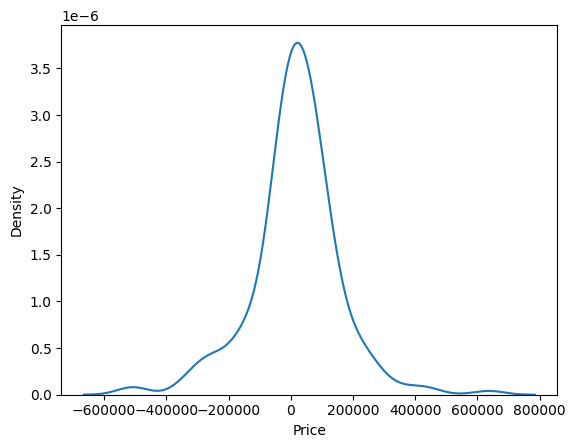

In [69]:
# 4.
tree_model = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_test = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test R2:", r2)
print("Test RMSE:", rmse)

plt.figure(figsize=(18, 6))
plot_tree(tree_model, filled=True, feature_names=X.columns, max_depth=3, fontsize=8)
plt.show()

residuals = y_test - y_pred_test
sns.kdeplot(residuals)

In [70]:
# 5.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on test set
y_pred_lin = linreg.predict(X_test)

# Calculate R² and RMSE
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("R:", r2_lin)
print("RMSE:", rmse_lin)

# The regression tree worked better likely because of tree's ability to model non-linear relationships well.

R: 0.7905785824101796
RMSE: 169351.7738117369


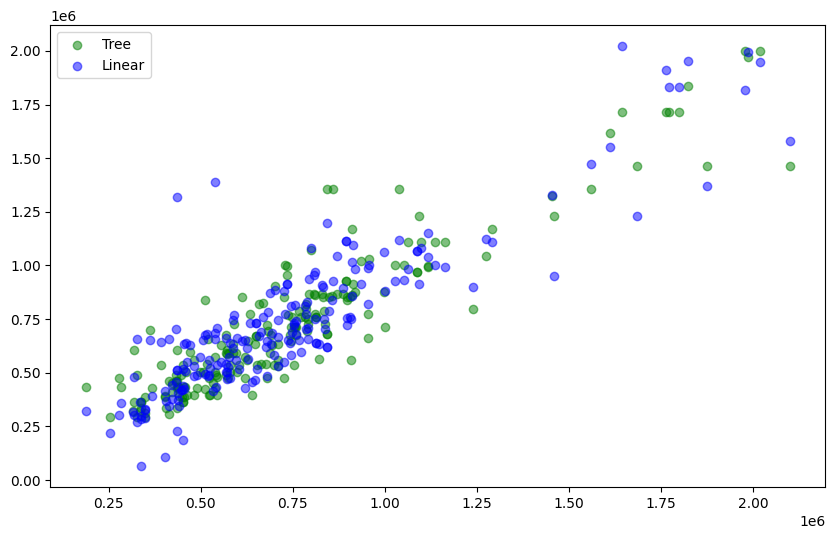

In [71]:
# 6.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Tree', color='green')
plt.scatter(y_test, y_pred_lin, alpha=0.5, label='Linear', color='blue')
plt.legend()
plt.show()
# I see a very similar predicition model for both methods.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [80]:
# 1.
data = pd.read_csv('trees/assignment/data/corporate_ratings.csv')
df = pd.DataFrame(data)
print(data.shape)
data.head()

(2029, 31)


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


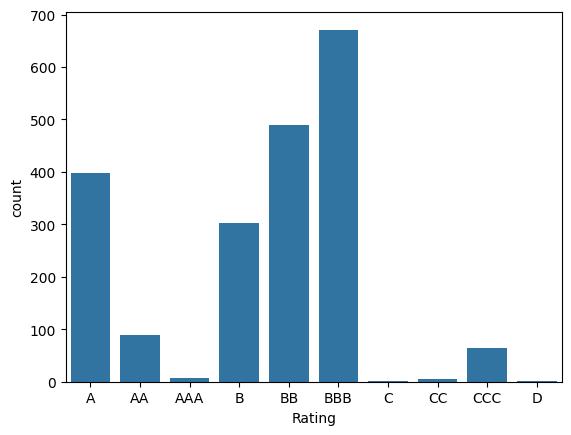

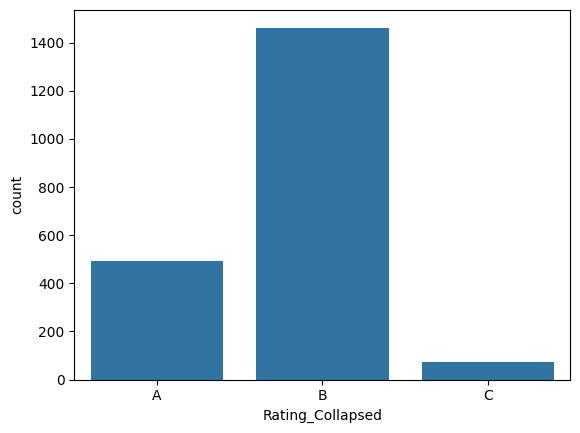

In [81]:
# 2.
sns.countplot(data=df, x='Rating', order=sorted(df['Rating'].unique()))
plt.show()
def collapse_rating(r):
    if r.startswith('A'):
        return 'A'
    elif r.startswith('B'):
        return 'B'
    elif r.startswith('C'):
        return 'C'
    else:
        return r  # leave it unchanged if not A/B/C

df['Rating_Collapsed'] = df['Rating'].apply(collapse_rating)

# Plot histogram of the simplified ratings
sns.countplot(data=df, x='Rating_Collapsed', order=['A', 'B', 'C'])
plt.show()

In [82]:
# 3.
df_features = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])
sector_dummies = pd.get_dummies(df_features['Sector'], drop_first=True)
df_features = df_features.drop(columns=['Sector'])

X = pd.concat([df_features, sector_dummies], axis=1)
X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


In [83]:
# 4.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create one-hot dummy variables for y
y_dummies = pd.get_dummies(df['Rating_Collapsed'])

# Drop irrelevant columns
drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
df = df.drop(columns=drop_cols)

# Use only numeric features (no one-hot for Sector)
X = df.drop(columns=['Rating_Collapsed']).select_dtypes(include=[np.number])
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummies, test_size=0.2, random_state=42)

# Train decision tree on one-hot-encoded targets (multi-output)
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Convert predictions and actual back to class labels using argmax
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

# Get class names
class_names = y_dummies.columns.tolist()

# Evaluate
acc = accuracy_score(y_test_labels, y_pred_labels)
cm = confusion_matrix(y_test_labels, y_pred_labels)

print('Accuracy:', acc)
print(pd.DataFrame(cm, index=class_names, columns=class_names))

Accuracy: 0.7093596059113301
    A    B  C  D
A  52   43  1  0
B  49  236  9  0
C   1   14  0  0
D   0    1  0  0


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?